In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用微软雅黑字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [2]:
from model import BPNNModel, XGBoostModel, GBDTModel, RandomForestModel
data = pd.read_excel('山河四省.xlsx')
x = ['人均地区生产总值（元）', '就业人员数（万人）', '财政一般预算支出（亿元）',
       '居民消费价格指数（上年=100）', '城镇居民人均可支配收入（元）']
y = ['人口出生率（‰）']

In [3]:
model = XGBoostModel(data, x, y, test_num=0.2, cv_folds=5, use_bayesian_optimization=False)
_, params, cv_results, results_df_xgb, selected_features, metrics, train_metric = model.train()
print(metrics)
print(train_metric)

  Feature  Importance
4      X5    0.860752
1      X2    0.408917
0      X1    0.183021
3      X4    0.095483
2      X3    0.068882
                          0
均方误差[MSE]          0.271113
均方根误差[RMSE]        0.520685
平均绝对误差[MAE]        0.415116
绝对误差中位数[MedianAE]  0.329398
平均绝对百分比误差[MAPE]    0.033802
决定系数               0.881672
                              0
均方误差[MSE]          3.086742e-07
均方根误差[RMSE]        5.555846e-04
平均绝对误差[MAE]        4.298267e-04
绝对误差中位数[MedianAE]  3.152657e-04
平均绝对百分比误差[MAPE]    3.827280e-05
决定系数               9.999999e-01


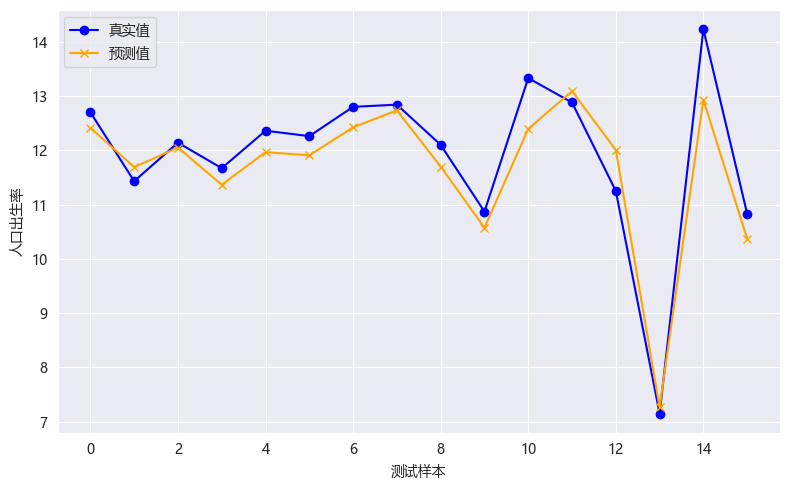

In [4]:
fig, axs = plt.subplots(1, 1, figsize=(8, 5))

# 设置字体大小和样式（可选）
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# 绘制 BP 神经网络的预测结果
axs.plot(results_df_xgb.index, results_df_xgb['真实值'], label='真实值', color='blue', marker='o')
axs.plot(results_df_xgb.index, results_df_xgb['预测值'], label='预测值', color='orange', marker='x')
axs.set_xlabel('测试样本')
axs.set_ylabel('人口出生率')
axs.legend()
axs.grid(True)
# 设置 y 轴格式保留两位小数

# 调整布局
plt.tight_layout()

# 保存图像
plt.savefig('模型预测对比.png')

# 显示图像
plt.show()